In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

In [2]:
import scipy.integrate as integrate
import scipy.special as special
from cmath import sin, cos, exp

# General integral, return (real part, imaginary part)
# All angles are in radians

def I0(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha))

def I1(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha))

def I2(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha))

In [3]:
from math import pi, sqrt
from numpy import conj, divide

def Ex(u, v, phi, alpha, A):
    return (A * (I0(u, v, alpha)[1][0] + I2(u, v, alpha)[1][0] * cos(2 * phi)).real + 1j * -1 * A * (I0(u, v, alpha)[0][0] + I2(u, v, alpha)[0][0] * cos(2 * phi)).real)

def Ey(u, v, phi, alpha, A):
    return (A * I2(u, v, alpha)[1][0] * sin(2 * phi).real - 1j * A * I2(u, v, alpha)[0][0] * sin(2 * phi).real)

def Ez(u, v, phi, alpha, A):
    return (-2 * A * I1(u, v, alpha)[0][0] * cos(phi).real - 2j * A * I1(u, v, alpha)[1][0] * cos(phi).real)

def Ellip(u, v, phi, alpha, A):
    return ((Ey(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A)) - Ez(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A))).imag, (Ez(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A)) - Ex(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A))).imag, (Ex(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A)) - Ey(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A))).imag)
    
def E(u, v, phi, alpha, A):
    return sqrt(Ex(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A)) + Ey(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A)) + Ez(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A)))

def Ex_norm(u, v, phi, alpha, A):
    return Ex(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ey_norm(u, v, phi, alpha, A):
    return Ey(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ez_norm(u, v, phi, alpha, A):
    return Ez(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ellip_norm(u, v, phi, alpha, A):
    return divide(Ellip(u, v, phi, alpha, A), E(u, v, phi, alpha, A) ** 2)

In [4]:
print(Ey_norm(0 ,2, 2, 0.55, 1))
print(E(1, 1, 1, 0.55, 1))

0.0129372154188j
0.23816564983


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:319: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


In [5]:
from numpy import angle

def z2polar(x, y):
    z = x + 1j * y
    return (abs(z), angle(z))

def polar2z(r, theta):
    return (r * cos(theta), r * sin(theta))

print(z2polar(0,4))
print(pi)

(4.0, 1.5707963267948966)
3.14159265359


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


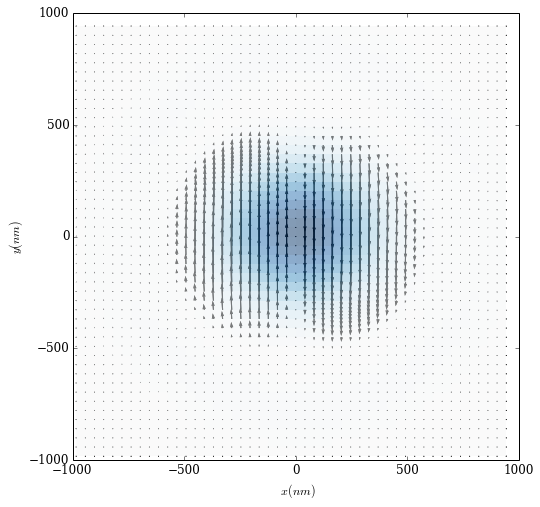

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)
M = empty_like(X)
Scale = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        temp = Ellip_norm(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = temp[0] * E_temp ** 2
        V[i][j] = temp[1] * E_temp ** 2
        M[i][j] = temp[2] * E_temp ** 2
        Scale[i][j] = E_temp ** 2

#print(U)
#print(V)
#print(M)
z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
C = ax1.pcolor(X, Y, Scale, alpha = 0.5, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#plt.colorbar(C)
#plt.savefig('Polarization.svg')

[[ 0.01626132  0.01722513  0.01776285 ...,  0.01785211  0.01776285
   0.01722513]
 [ 0.01713771  0.01766314  0.01770686 ...,  0.0172657   0.01770686
   0.01766314]
 [ 0.01754169  0.01758137  0.01710373 ...,  0.01613152  0.01710373
   0.01758137]
 ..., 
 [ 0.01747875  0.01701197  0.01602104 ...,  0.01456865  0.01602104
   0.01701197]
 [ 0.01754169  0.01758137  0.01710373 ...,  0.01613152  0.01710373
   0.01758137]
 [ 0.01713771  0.01766314  0.01770686 ...,  0.0172657   0.01770686
   0.01766314]]
[[ 0.01596189  0.01708504  0.01770064 ...,  0.01779208  0.01770064
   0.01708504]
 [ 0.01698774  0.01760058  0.01764099 ...,  0.01710733  0.01764099
   0.01760058]
 [ 0.01747575  0.01751424  0.01692665 ...,  0.01572876  0.01692665
   0.01751424]
 ..., 
 [ 0.01741595  0.01683245  0.015583   ...,  0.01370304  0.015583
   0.01683245]
 [ 0.01747575  0.01751424  0.01692665 ...,  0.01572876  0.01692665
   0.01751424]
 [ 0.01698774  0.01760058  0.01764099 ...,  0.01710733  0.01764099
   0.01760058]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


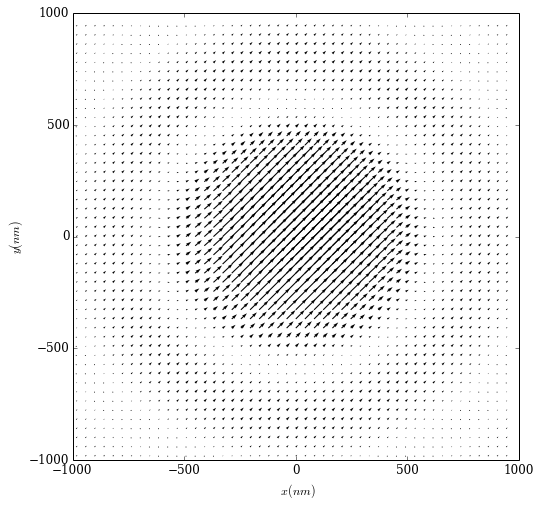

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        Ex_temp = sqrt(Ex(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A) * conjugate(Ex(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)))
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = E_temp 
        V[i][j] = Ex_temp

print(U)
print(V)
#print(M)
#z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
#C = ax1.pcolor(X, Y, Scale, alpha = 0.5, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#plt.colorbar(C)
#plt.savefig('Electric field.svg')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


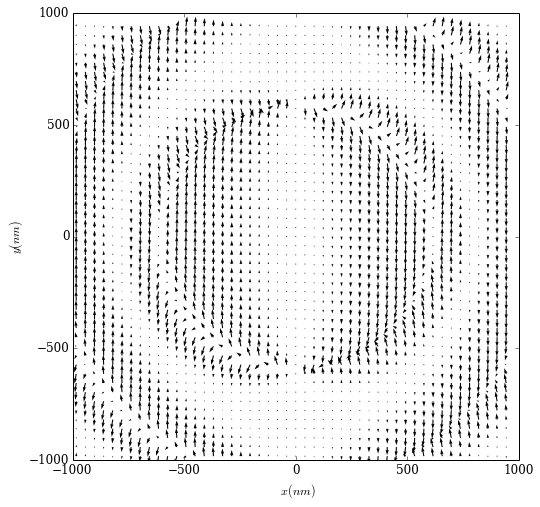

In [6]:
# Ellipticity and polarization calculation
# Checked with Wolf59

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)
M = empty_like(X)
Scale = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        temp = Ellip_norm(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = temp[0]
        V[i][j] = temp[1]
        M[i][j] = temp[2]
        Scale[i][j] = E_temp ** 2

#print(U)
#print(V)
#print(M)
z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)
#plt.savefig('Ellipticity.svg')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


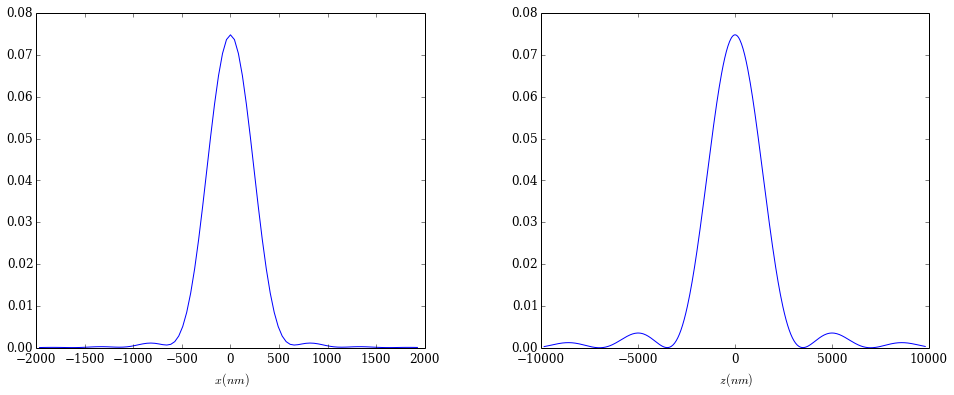

In [7]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  


X = divide(arange(-24, 24, 0.5), k)
Scale = empty_like(X)

Z = divide(arange(-120, 120, 0.5), k)
Scale2 = empty_like(Z)

for i, _x in enumerate(X):
    E_temp = E(0,k * _x * sin(alpha), 0, alpha, A)
    Scale[i] = E_temp ** 2
    
for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Scale2[i] = E_temp ** 2


figure = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(X, Scale)
ax1.set_xlabel(' $x (nm)$')

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(Z, Scale2)
ax2.set_xlabel(' $z (nm)$')
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

# Light shift calculation

Above we define the polarization of the incoming light to the along the $x$ direction and propogates along the $z$ direction. In the following light-shift calculation, we define the quantization along the $x$ direction. Then the total light shift is given by

$\Delta E(J, m_J, \omega) = -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{m_J}{J} - \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} \frac{3 m_J^2 - J(J+1)}{J(2J-1)}$

where $\textbf{E}(\textbf{r}) = \hat{\varepsilon} E_0^{(+)} (\textbf{r}) e^{-i \omega t} + c.c.$

From the previous calculation, we know the polarizabilities for $^1S_0$ and $^3P_1$ are

$\alpha_{^1S_0}^{(s)} = 942.543258386$

$\alpha_{^3P_1}^{(s)} = 739.595588319$

$\alpha_{^3P_1}^{(v)} = 44.4213982605135$

$\alpha_{^3P_1}^{(t)} = -101.917990775284$

They are all in atomic units.


In [8]:
alpha1_s = 942.543258386
alpha2_s = 739.595588319
alpha2_v = 44.4213982605135
alpha2_t = -101.917990775284

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


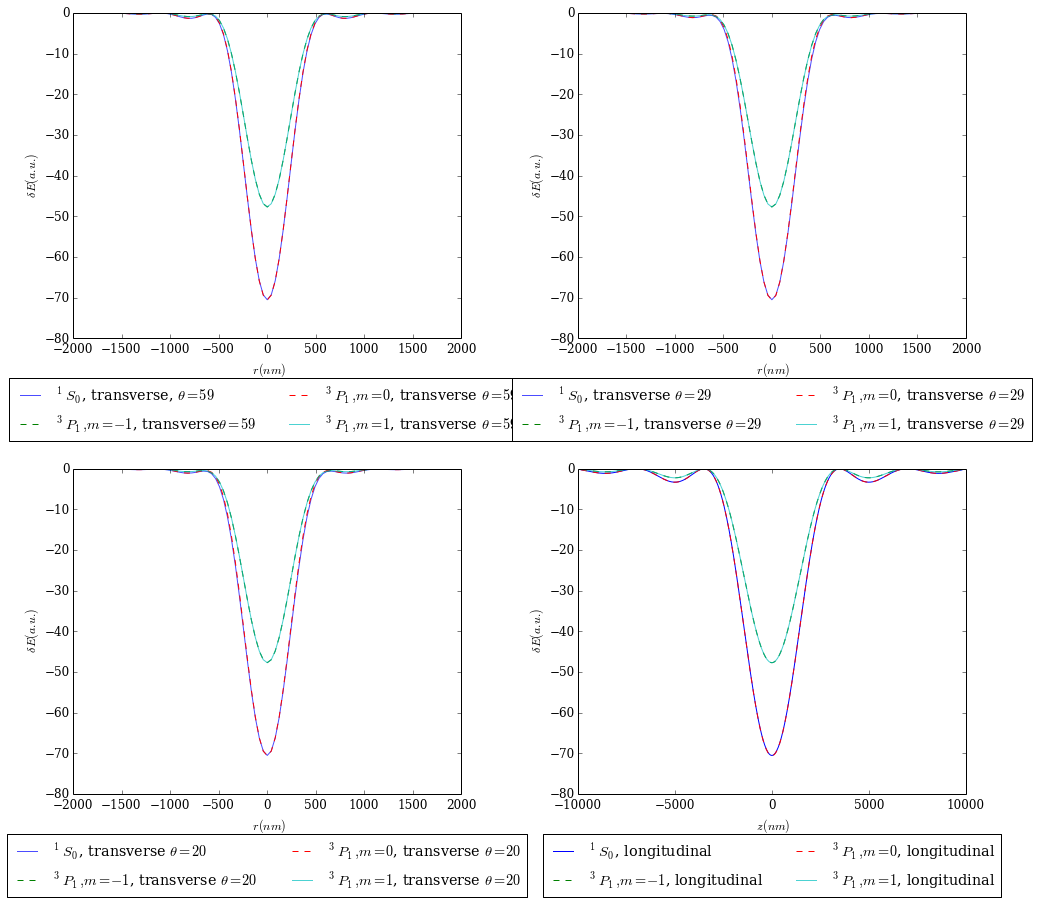

In [9]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb              
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

theta1 = pi / 3
theta2 = pi / 6
theta3 = pi / 9

R = divide(arange(-24, 24, 0.5), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-120, 120, 0.5), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    E_temp = E(0,k * _r * sin(alpha), theta1, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta1, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta1, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta1, alpha, A)[0]
    LS_1S0_1[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_1[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_1[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_1[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta2, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta2, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta2, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta2, alpha, A)[0]
    
    LS_1S0_2[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_2[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_2[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_2[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta3, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta3, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta3, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta3, alpha, A)[0]
    
    LS_1S0_3[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_3[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_3[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_3[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t



for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ex_temp = sqrt(Ex(k * _z * sin(alpha) ** 2, 0, 0,alpha, A) * conjugate(Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)))
    Ellipx_temp = Ellip(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)[0]
    LS_1S0_z[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_z[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_z[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_z[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (a.u.)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (a.u.)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (a.u.)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (a.u.)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


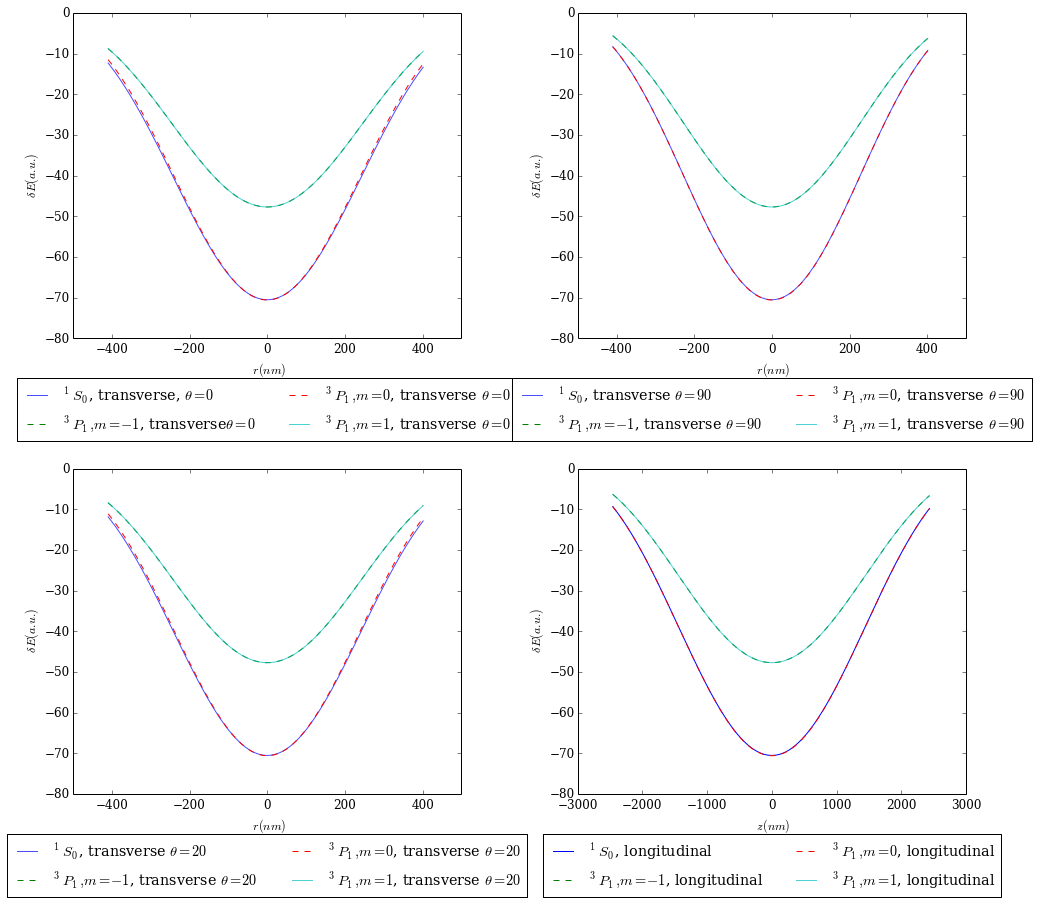

In [15]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb              
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

theta1 = 0
theta2 = pi / 2
theta3 = pi / 9

R = divide(arange(-5, 5, 0.1), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-30, 30, 0.3), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    E_temp = E(0,k * _r * sin(alpha), theta1, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta1, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta1, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta1, alpha, A)[0]
    LS_1S0_1[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_1[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_1[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_1[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta2, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta2, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta2, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta2, alpha, A)[0]
    
    LS_1S0_2[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_2[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_2[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_2[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta3, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta3, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta3, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta3, alpha, A)[0]
    
    LS_1S0_3[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_3[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_3[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_3[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t



for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ex_temp = sqrt(Ex(k * _z * sin(alpha) ** 2, 0, 0,alpha, A) * conjugate(Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)))
    Ellipx_temp = Ellip(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)[0]
    LS_1S0_z[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_z[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_z[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_z[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (a.u.)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (a.u.)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (a.u.)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (a.u.)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)